In [1]:
%matplotlib notebook
import numpy as np
import mpl_toolkits.mplot3d as a3
import matplotlib.pyplot as plt

In [2]:
from packtets import pack_tets
from packtets.geometry import Cell
L = .75; theta = np.pi/2
vx = L * np.array([1,0,0])
vy = L * np.array([np.cos(theta),np.sin(theta),0])
vz = L * np.array([np.cos(theta)*np.cos(theta),np.cos(theta)*np.sin(theta),np.sin(theta)])

#vx = L * np.array([1,1,0])
#vy = L * np.array([1,0,1])
#vz = L * np.array([0,1,1])
box = Cell(vx, vy, vz)
res = pack_tets(box, time_budget=60, verbose=True)

0.0 0 11
0.0 0 12
0.0 0 13
0.0 0 14
0.0 0 15
0.0 0 16
0.0 0 17
0.279350827135 1 18
0.279350827135 1 19
0.279350827135 1 20
0.279350827135 1 21
0.279350827135 1 22
0.279350827135 1 23
0.279350827135 1 24
0.279350827135 1 25
0.279350827135 1 26
0.279350827135 1 27
0.279350827135 1 28
0.279350827135 1 29
0.279350827135 1 30
0.279350827135 1 31
0.279350827135 1 32
0.279350827135 1 33
0.279350827135 1 34
0.279350827135 1 35
0.279350827135 1 36
0.279350827135 1 37
0.279350827135 1 38
0.279350827135 1 39
0.279350827135 1 40
0.279350827135 1 41
0.279350827135 1 42
0.279350827135 1 43
0.279350827135 1 44
0.279350827135 1 45
0.279350827135 1 46
0.279350827135 1 47
0.279350827135 1 48
0.279350827135 1 49
0.279350827135 1 50
0.279350827135 1 51
0.279350827135 1 52
0.279350827135 1 53
0.279350827135 1 54
0.279350827135 1 55
0.279350827135 1 56
0.279350827135 1 57
0.279350827135 1 58
0.279350827135 1 59
0.279350827135 1 60
0.279350827135 1 61
0.279350827135 1 62
0.279350827135 1 63
0.279350827135 1 

<IPython.core.display.Javascript object>


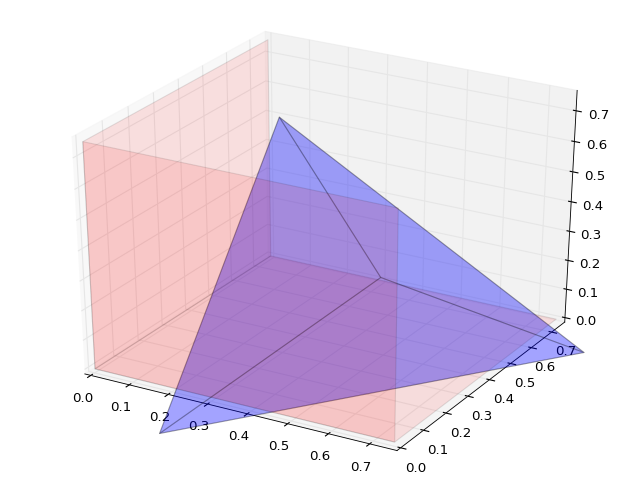

In [3]:
import scipy as sp
ax = a3.Axes3D(plt.figure(10))

bounding = [box.vx, box.vy, box.vz]
for i,j in [(0,1), (0,2), (1,2)]:
    verts = [(0,0,0)]
    verts.append(bounding[i])
    verts.append(bounding[i]+bounding[j])
    verts.append(bounding[j])
    face = a3.art3d.Poly3DCollection([verts], alpha=0.1)
    face.set_facecolor('red')
    face.set_edgecolor('k')

    ax.add_collection3d(face)


for tet in res:
    syms = tet.get_symmetry(box.vx, box.vy, box.vz)
    for s in syms[0:1]:
        for x,y,z in [(0,1,2), (0,1,3), (0,2,3), (1,2,3)]:
            verts = [tuple(s.verts[x]), tuple(s.verts[y]), tuple(s.verts[z])]
            tri = a3.art3d.Poly3DCollection([verts], alpha=0.2)
            tri.set_edgecolor('k')
            ax.add_collection3d(tri)
ax.set_xlim(0,L)
ax.set_ylim(0,L)
ax.set_zlim(0,L);